## Modelos 

In [29]:
# Librerias requeridas
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler # Para normalizar de datos

# Actualizar el archivo de funciones
import importlib 
import A_Funciones as funciones # Este archivo contiene las funciones a utilizar
importlib.reload(funciones) # Actualiza los cambios en el archivo de las funciones

# Algoritmos para los modelos 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

In [3]:
# Cargar los datos de reclamaciones 
df_reclamaciones = joblib.load('Data_final\\df_final_reclamaciones.pkl')

In [4]:
df_reclamaciones

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico
0,18686469,1.0,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1579219,40,61.0,Diagnostico Pendiente
1,18686469,1.0,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,442805,40,61.0,Diagnostico Pendiente
2,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,461626,40,729.0,Diagnostico Pendiente
3,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,593054,40,729.0,Diagnostico Pendiente
4,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,455257,40,729.0,Diagnostico Pendiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781400,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,579721,45,729.0,Pruebas complementarias
3781401,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,479786,45,729.0,Diagnostico Pendiente
3781402,34178573,1.0,Cali,0,0,0,0,0.0,LABORATORIO CLINICO,1,675070,45,729.0,Diagnostico Pendiente
3781403,34178573,1.0,Cali,0,0,0,0,0.0,CONSULTA EXTERNA,2,565193,45,729.0,Diagnostico Pendiente


### Modelo reclamaciones

Este modelo se realiza con el propósito de cumplir uno de los primeros objetivos del reto, que es lograr predecir los costos asociados que tendrán los usuarios respectos a sus seguros en salud a lo largo para así poder tarifar los seguros. 

In [5]:
# Generamos variables dummies
df_reclamaciones = pd.get_dummies(df_reclamaciones, dtype=int)


In [6]:
y = df_reclamaciones.Valor_Pagado
X0 = df_reclamaciones.loc[:,~ df_reclamaciones.columns.isin(['Valor_Pagado','Asegurado_Id'])]

In [7]:
scaler = StandardScaler()
scaler.fit(X0)

X1 = scaler.transform(X0)
X = pd.DataFrame(X1 , columns = X0.columns)
X

,Sexo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Eventos,Edad,Duracion_Poliza_Dias,Ciudad_Barranquilla,...,Clasificacion_Diagnostico_Enfermedades del sistema nervioso,Clasificacion_Diagnostico_Enfermedades digestivas,Clasificacion_Diagnostico_Enfermedades endocrinas,Clasificacion_Diagnostico_Enfermedades respiratorias,Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios),Clasificacion_Diagnostico_Lesiones traumaticas,Clasificacion_Diagnostico_Malformaciones congenitas,Clasificacion_Diagnostico_Neoplasias,Clasificacion_Diagnostico_Pruebas complementarias,Clasificacion_Diagnostico_Trastornos mentales
0,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,0.200468,0.253115,-2.265091,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,-2.265091,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
2,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
3,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
4,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640817,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,10.088100,-0.01212
1640818,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1640819,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1640820,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.081034,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212


### Selección de variables y modelo 

In [20]:
# Modelos puesto a prueba
modelo_random_forest = RandomForestRegressor()
modelo_knn = KNeighborsRegressor()
modelo_xgboost = xgb.XGBRegressor()

modelos = list([modelo_random_forest, modelo_xgboost])

In [21]:
# RFE para la selección de variables para distintos modelos
def funcion_rfe(modelos, X, y, num_variables, paso):
  resultados = {}
  for modelo in modelos: 
    rfemodelo = RFE(modelo, n_features_to_select = num_variables, step = paso)
    fit = rfemodelo.fit(X,y)
    var_names = fit.get_feature_names_out()
    puntaje = fit.ranking_
    diccionario_importancia = {}
    nombre_modelo = modelo.__class__.__name__

    for i,j in zip(var_names,puntaje):
      diccionario_importancia[i] = j
      resultados[nombre_modelo] = diccionario_importancia
  
  return resultados

In [22]:
# Muestra aleatorio de los datos que garantize la reproducibilidad de los datos
X_sample = X.sample(frac = 0.05, random_state = 18)
y_sample = y.sample(frac = 0.05, random_state = 18)

In [23]:
X_sample.shape

(82041, 54)

In [24]:
# Selección de variables por el método de eliminación hacia atrás
df_resultados = pd.DataFrame(funcion_rfe(modelos, X_sample, y_sample, 38, 1))
df_resultados.fillna('No incluída',inplace = True)
df_resultados

C:\Users\jorge\AppData\Local\Temp\ipykernel_10252\4071276435.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No incluída' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resultados.fillna('No incluída',inplace = True)


,RandomForestRegressor,XGBRegressor
Sexo,1.0,1.0
CANCER,1.0,1.0
EPOC,1.0,1.0
DIABETES,1.0,1.0
HIPERTENSION,1.0,1.0
ENF_CARDIOVASCULAR,1.0,1.0
Eventos,1.0,1.0
Edad,1.0,1.0
Duracion_Poliza_Dias,1.0,1.0
Ciudad_Barranquilla,1.0,1.0


In [28]:
# Variable selccionadas
var_names = ['Sexo', 'CANCER','EPOC','DIABETES','HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Eventos', 'Edad', 'Duracion_Poliza_Dias', 'Ciudad_Barranquilla',
             'Ciudad_Bogota','Ciudad_Cali','Ciudad_Cartagena','Ciudad_Medellin','Reclamacion_CONSULTA DE URGENCIAS', 'Reclamacion_CONSULTA EXTERNA',
             'Reclamacion_DIALISIS','Reclamacion_EXAMENES DE DIAGNOSTICO','Reclamacion_FISIOTERAPIA ILIMITADA', 'Reclamacion_LABORATORIO CLINICO',
             'Reclamacion_PAMD', 'Reclamacion_TRATAMIENTO AMBULATORIO POR CANCER', 'Reclamacion_TRATAMIENTOS AMBULATORIOS ESPECIALES',
             'Clasificacion_Diagnostico_Diagnostico Pendiente', 'Clasificacion_Diagnostico_Embarazo, parto y puerperio', 'Clasificacion_Diagnostico_Enfermedades de la piel',
             'Clasificacion_Diagnostico_Enfermedades del aparato circulatorio', 'Clasificacion_Diagnostico_Enfermedades del aparato genitourinario',
             'Clasificacion_Diagnostico_Enfermedades del aparato musculoesqueletico', 'Clasificacion_Diagnostico_Enfermedades del sistema nervioso',
             'Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios)', 'Clasificacion_Diagnostico_Lesiones traumaticas',
             'Clasificacion_Diagnostico_Neoplasias', 'Clasificacion_Diagnostico_Pruebas complementarias']
X_sel = X_sample[var_names]

In [30]:
# Validación del rendimiento de los modelos 
def medir_modelos(modelos, scoring, X, y, cv):

    metric_modelos = pd.DataFrame()
    for modelo in modelos:
        scores = cross_val_score(modelo, X, y, scoring = scoring, cv = cv )
        pdscores = pd.DataFrame(scores)
        metric_modelos = pd.concat([metric_modelos,pdscores], axis = 1)
    
    metric_modelos.columns = ['RandomForestRegressor','XGBRegressor']
    return metric_modelos

In [31]:
# Medimos el desempeño de los modelos para todo el conjunto de datos y para las variables seleccionadas
r2_df = medir_modelos(modelos,'r2', X_sample, y_sample, 5)
display(r2_df)
r2_var_sel = medir_modelos(modelos, 'r2', X_sel, y_sample, 5)
display(r2_var_sel)

,RandomForestRegressor,XGBRegressor
0,0.383067,0.075319
1,0.360402,0.402681
2,-1.089139,-1.055380
3,0.360621,0.326114
4,0.168589,0.200077


,RandomForestRegressor,XGBRegressor
0,0.398814,0.053814
1,0.362206,0.422376
2,-1.322658,-0.897244
3,0.354460,0.306311
4,0.190351,0.215016


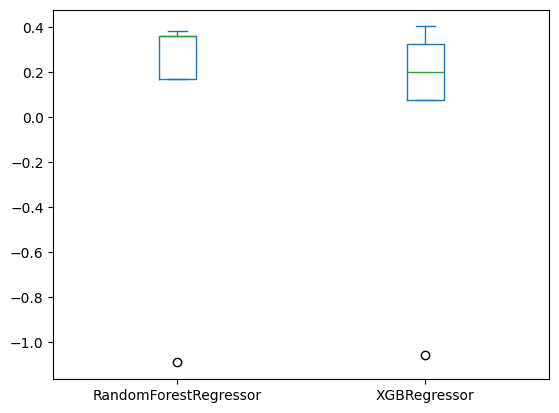

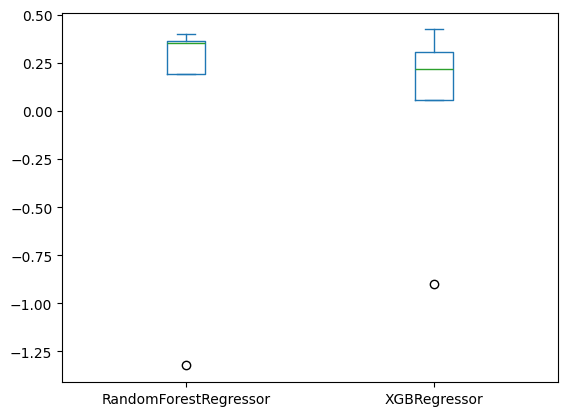

In [37]:
# Comparación entre el desempeño de los modelos con todas las variables y con las seleccionadas
r2_df.plot(kind = 'box');
r2_var_sel.plot(kind = 'box');

### Afinamiento de hiperparámetros